<a href="https://colab.research.google.com/github/smbillah/ist526/blob/main/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Libraries

In [ ]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

# Mount Google Drive

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# Ref
https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01

#How to Import Time Series in Python?
In read_csv() function, set parse_dates = True, to convert the ‘Date’ column to DateTimeIndex


In [ ]:
df_stock = pd.read_csv('data/FB_data.csv', parse_dates=True, index_col = "Date")
# adding Date as column and index
df_stock['Date'] = df_stock.index

# display
display(df_stock.head())
display(df_stock.tail())

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-06-20,190.949997,191.160004,187.639999,189.529999,189.529999,14635700,2019-06-20
2019-06-21,188.750000,192.000000,188.750000,191.139999,191.139999,22751200,2019-06-21
2019-06-24,192.419998,193.979996,191.570007,192.600006,192.600006,15509000,2019-06-24
2019-06-25,192.880005,193.139999,188.130005,188.839996,188.839996,16750300,2019-06-25
2019-06-26,189.539993,190.759995,187.309998,187.660004,187.660004,12808600,2019-06-26


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-06-15,225.089996,233.770004,224.800003,232.500000,232.500000,15340300,2020-06-15
2020-06-16,237.139999,238.460007,233.000000,235.649994,235.649994,15236700,2020-06-16
2020-06-17,235.000000,237.589996,231.729996,235.529999,235.529999,19552800,2020-06-17
2020-06-18,234.990005,236.139999,232.149994,235.940002,235.940002,15782500,2020-06-18
2020-06-19,237.789993,240.830002,235.550003,238.789993,238.789993,30069700,2020-06-19


# Quick Plot

In [ ]:
fig = px.line(
    data_frame = df_stock, 
    x='Date', 
    y='High', 
    title='Stock price (High)'
)

fig.show()

In [ ]:
fig = px.area(
    data_frame = df_stock, 
    x='Date', 
    y='High', 
    title='Stock price (High)'
)

fig.show()

# Plotting all columns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f010f1b7990>,
      dtype=object)

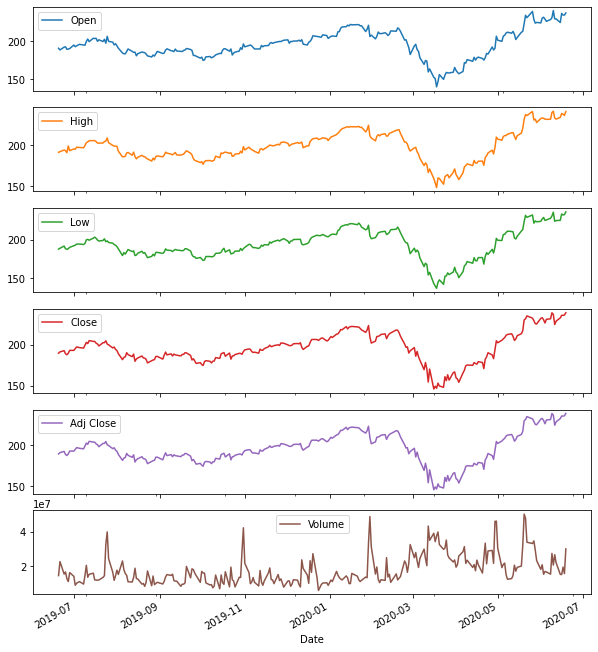

In [ ]:
df.plot(subplots = True, figsize = (10, 12))

# Melting Data-frame
Sometimes it is benefical to stack all columns into one and another column as label. To do that, we use pandas' melt command (below). Note that all 6 columns are not stacked into a single 'Label' column and another one named Value to show their types.

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

# remove Volume from this dataset
df_stock_temp = df_stock.drop(['Volume'], axis = 1)

df_stock_melted = pd.melt(
    df_stock_temp, id_vars=['Date'], 
    var_name = 'Label',
    value_vars=['Open', 'High', 'Low', 'Close', 'Adj Close'],    
    value_name = 'Value'
)
df_stock_melted.set_index(['Date'], inplace=True)
df_stock_melted['Date'] = df_stock_melted.index


display(df_stock_melted.head())
display(df_stock_melted.tail())

,Label,Value,Date
Date,,,
2019-06-20,Open,190.949997,2019-06-20
2019-06-21,Open,188.750000,2019-06-21
2019-06-24,Open,192.419998,2019-06-24
2019-06-25,Open,192.880005,2019-06-25
2019-06-26,Open,189.539993,2019-06-26


,Label,Value,Date
Date,,,
2020-06-15,Adj Close,232.500000,2020-06-15
2020-06-16,Adj Close,235.649994,2020-06-16
2020-06-17,Adj Close,235.529999,2020-06-17
2020-06-18,Adj Close,235.940002,2020-06-18
2020-06-19,Adj Close,238.789993,2020-06-19


In [ ]:
# show all lines together
fig = px.line(
    data_frame = df_stock_melted, 
    x='Date', 
    y='Value', 
    color = 'Label',
    title='Stock price'
)

fig.show()

In [ ]:
# alternatively, you can use Ploty Go's subfigure.add_traces(go.Scatter(...))

# Data Filter

In [ ]:
fig = px.line(
    data_frame = df_stock, 
    x='Date', 
    y='High', title='Stock price (High) with Rangeslider'
)


# Add rangeslider
fig.update_xaxes(        
    # add attribute rangeslider_visible (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector)    
    rangeslider_visible = True 
)

# show figure
fig.show()

In [ ]:
fig = px.line( # you can also use 'px.area'
    data_frame = df_stock, 
    x= df_stock.index, # changed from column 'Date' to index Date, 
    y='High', title='Stock price (High) with Rangeslider and RangeSliders'
)


# Add rangeslider
fig.update_xaxes(        
    # add attribute rangeslider_visible (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector)    
    rangeslider_visible = True,

    # next, add rangeselector with rangeselector_buttons (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector-buttons)
    rangeselector_buttons = list(
        # list begin
        [          
         # Each dictionary item below indicates a filter button. Dictionary keys (e.g., count, label, step, stepmode) are described in rangeselector_buttons's documnetation
          dict(count = 3,  label = "1Q", step = "month", stepmode = "backward"), # button 1
          dict(count = 4,  label = "2Q", step = "month", stepmode = "backward"), # button 2
          dict(count = 8,  label = "3Q", step = "month", stepmode = "backward"), # button 3
          dict(count = 12, label = "4Q", step = "month", stepmode = "backward"), # button 4
          dict(step="all")                                                       # button 5
        ] 
        # list end    
    )
)

# show figure
fig.show()

# Data Animation

In [ ]:
df_country = px.data.gapminder()

display(df_country.head())
display(df_country.tail())

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298,ZWE,716


In [ ]:
# note that animation_group should exist in all frames
fig = px.scatter(
    data_frame = df_country, 
    x="gdpPercap",         # gdp per capita
    y="lifeExp",           # life expectancy  
    size="pop",            # population
    color="continent",     # group/label
    hover_name="country",
    log_x=True, 
    size_max=55, 
    range_x=[100,100000], 
    range_y=[25,90],
    title= "GDP Per Captia vs Life Expectancy of Countries", 
    
    # animation control
    animation_frame="year", 
    animation_group="country",
)

fig.show()

In [ ]:
# Watch as bars chart population changes
fig = px.bar(
    data_frame = df_country, 
    x="continent",        # continent
    y="pop",              # population    
    color="continent",    # group/label
     
    range_y=[0, 8000000000],
    title= "Population of Countries", 
    
    # animation control
    animation_frame="year", 
    animation_group="country",
)

fig.show()

# Adding facets

In [ ]:
# adding facet
fig = px.scatter(
    data_frame = df_country, 
    x="gdpPercap",         # gdp per capita
    y="lifeExp",           # life expectancy  
    size="pop",            # population
    color="continent",     # group/label
    hover_name="country",
    log_x=True, 
    size_max=55, 
    range_x=[100,100000], 
    range_y=[25,90],
    title= "GDP Per Captia vs Life Expectancy of Countries", 
    
    # animation control
    animation_frame="year", 
    animation_group="country",

    # This is new #
    facet_col="continent" # new attribute facet 
)

fig.show()

# Slicing Data

In [ ]:
# showing data only for 2019
df_subset =  df['2019']
display(df_subset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-20,190.949997,191.160004,187.639999,189.529999,189.529999,14635700
2019-06-21,188.750000,192.000000,188.750000,191.139999,191.139999,22751200
2019-06-24,192.419998,193.979996,191.570007,192.600006,192.600006,15509000
2019-06-25,192.880005,193.139999,188.130005,188.839996,188.839996,16750300
2019-06-26,189.539993,190.759995,187.309998,187.660004,187.660004,12808600
...,...,...,...,...,...,...
2019-12-24,206.300003,206.789993,205.000000,205.119995,205.119995,6046300
2019-12-26,205.570007,207.820007,205.309998,207.789993,207.789993,9350700
2019-12-27,208.669998,208.929993,206.589996,208.100006,208.100006,10284200


In [ ]:
# showing data only for August, 2019
df_subset =  df['2019-08']
display(df_subset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,194.169998,198.470001,190.880005,192.729996,192.729996,17777000
2019-08-02,191.100006,192.619995,188.070007,189.020004,189.020004,15297000
2019-08-05,184.690002,185.669998,179.339996,181.729996,181.729996,23086700
2019-08-06,183.690002,185.789993,183.089996,184.509995,184.509995,18035700
2019-08-07,183.600006,186.369995,181.220001,185.149994,185.149994,15833200
2019-08-08,186.619995,190.339996,184.050003,190.160004,190.160004,14828900
2019-08-09,190.000000,190.979996,187.119995,187.850006,187.850006,11058800
2019-08-12,186.850006,187.589996,184.460007,185.369995,185.369995,10936300
2019-08-13,185.520004,191.380005,185.369995,188.449997,188.449997,13577000


In [ ]:
# showing data from August 1st to 15th, 2019
df_subset =  df['2019-08-01': '2019-08-15']
display(df_subset)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,194.169998,198.470001,190.880005,192.729996,192.729996,17777000
2019-08-02,191.100006,192.619995,188.070007,189.020004,189.020004,15297000
2019-08-05,184.690002,185.669998,179.339996,181.729996,181.729996,23086700
2019-08-06,183.690002,185.789993,183.089996,184.509995,184.509995,18035700
2019-08-07,183.600006,186.369995,181.220001,185.149994,185.149994,15833200
2019-08-08,186.619995,190.339996,184.050003,190.160004,190.160004,14828900
2019-08-09,190.000000,190.979996,187.119995,187.850006,187.850006,11058800
2019-08-12,186.850006,187.589996,184.460007,185.369995,185.369995,10936300
2019-08-13,185.520004,191.380005,185.369995,188.449997,188.449997,13577000


In [ ]:
fig = px.line(
    data_frame = df_subset, 
    # x='Date', 
    y='Open', title='subset'
)

# df_subset['Open'].plot()
# plt.show()
fig.show()

# Missing value

In [ ]:
# replace missing values with columns' means

df_subset = df_subset.fillna(df_subset.mean())

# Rolling Window
More info: https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/

In [ ]:
df_rolling = df_subset['Open'].rolling(window = 5).mean()
display(df_rolling.head())

Date
2019-08-01           NaN
2019-08-02           NaN
2019-08-05           NaN
2019-08-06           NaN
2019-08-07    187.450003
Name: Open, dtype: float64

In [ ]:
# replace missing values
df_rolling = df_rolling.fillna(df_rolling.mean())
display(df_rolling.head())

Date
2019-08-01    184.499221
2019-08-02    184.499221
2019-08-05    184.499221
2019-08-06    184.499221
2019-08-07    187.450003
Name: Open, dtype: float64

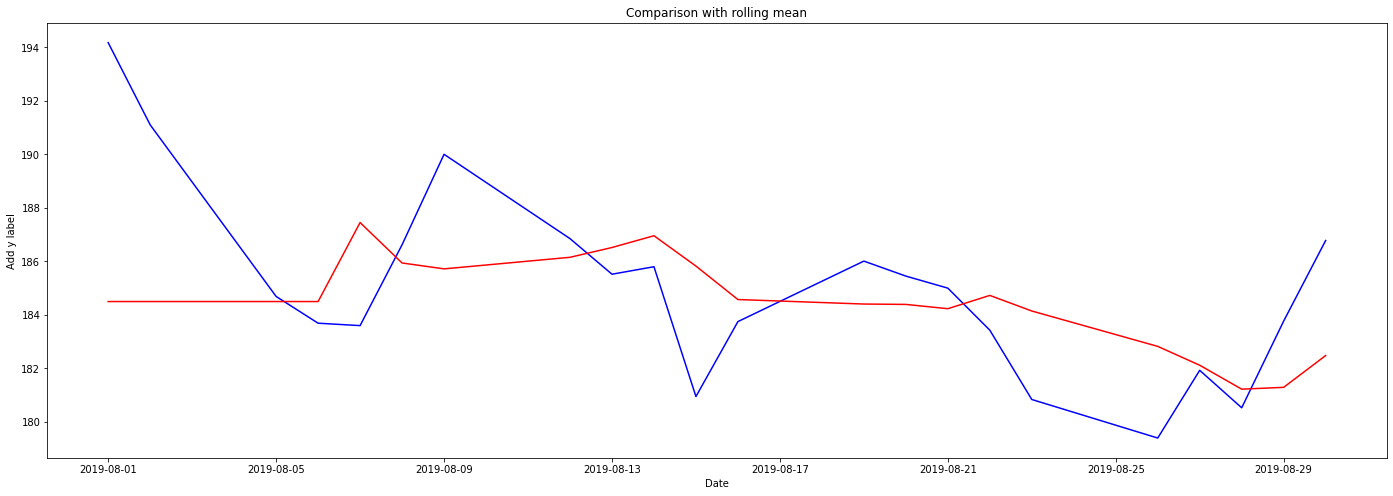

In [ ]:
# plot another column
fig, ax = plt.subplots(1,1, figsize=(24, 8))

# add labels, axes descriptions
ax.set_title('Comparison with rolling mean') #title
ax.set_xlabel('Date') #x label
ax.set_ylabel('Add y label') #y label

ax.plot(df_subset['Open'], color = 'blue')
ax.plot(df_rolling, color = 'red')

#
# df_rolling.plot()
plt.show()

# Seasonality

In [ ]:
# accessing time index
display(df.head())
display(df.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-20,190.949997,191.160004,187.639999,189.529999,189.529999,14635700
2019-06-21,188.750000,192.000000,188.750000,191.139999,191.139999,22751200
2019-06-24,192.419998,193.979996,191.570007,192.600006,192.600006,15509000
2019-06-25,192.880005,193.139999,188.130005,188.839996,188.839996,16750300
2019-06-26,189.539993,190.759995,187.309998,187.660004,187.660004,12808600


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-15,225.089996,233.770004,224.800003,232.500000,232.500000,15340300
2020-06-16,237.139999,238.460007,233.000000,235.649994,235.649994,15236700
2020-06-17,235.000000,237.589996,231.729996,235.529999,235.529999,19552800
2020-06-18,234.990005,236.139999,232.149994,235.940002,235.940002,15782500
2020-06-19,237.789993,240.830002,235.550003,238.789993,238.789993,30069700


In [ ]:
display(df.index.year)
display(df.index.month)

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=253)

Int64Index([6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
           dtype='int64', name='Date', length=253)

In [ ]:
# group by year
index_year = df.index.year
df_by_year = df.groupby(index_year).mean()
display(df_by_year)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019,191.917111,193.721259,189.826371,191.801555,191.801555,1.393375e+07
2020,200.180763,203.374662,197.141441,200.649831,200.649831,2.256017e+07


# Autocorrelation and Partial Autocorrelation
A correlation between a time series and its delayed version.
Useful in finding patterns

In [ ]:
from statsmodels.graphics import tsaplots # time series plots

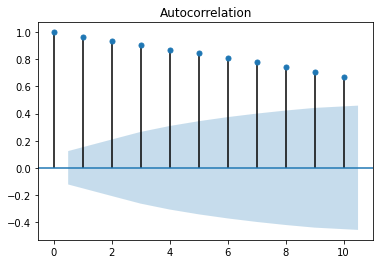

In [ ]:
fig = tsaplots.plot_acf(df['Open'], lags = 10)
plt.show()


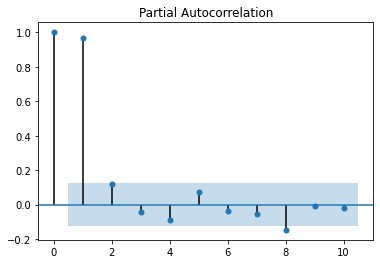

In [ ]:
fig = tsaplots.plot_pacf(df['Open'], lags = 10)
plt.show()


# Properties of Time Series Data
1. Seasionality: is there any clear pattern?
2. Trend: is there any consistent upward or downward pattern?
3. Noise: is there any outlier?

In [ ]:
import statsmodels.api as sm
from pylab import rcParams

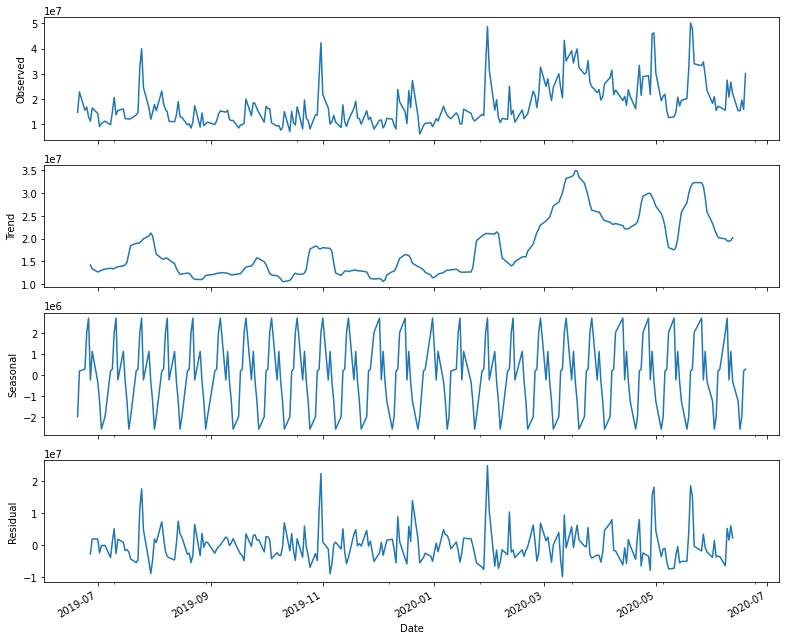

In [ ]:
rcParams['figure.figsize'] = 11,9
decomposition = sm.tsa.seasonal_decompose(x = df['Volume'], freq=10, model = 'Additive')
fig = decomposition.plot()
plt.show()

In [ ]:
display(dir(decomposition))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend']

In [ ]:
display(decomposition.seasonal)

Date
2019-06-20   -1.996313e+06
2019-06-21    1.904019e+05
2019-06-24    2.853721e+05
2019-06-25    2.040011e+06
2019-06-26    2.728184e+06
                  ...     
2020-06-15   -1.248857e+06
2020-06-16   -2.590696e+06
2020-06-17   -1.996313e+06
2020-06-18    1.904019e+05
2020-06-19    2.853721e+05
Name: Volume, Length: 253, dtype: float64

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1,216.252382,218.119524,214.417143,216.643333,216.643333,1.653879e+07
2,207.037896,209.679475,204.963157,207.505263,207.505263,1.671242e+07
3,165.283182,170.172727,160.389092,165.747727,165.747727,2.952126e+07
4,177.120951,179.785715,173.592857,177.003335,177.003335,2.578487e+07
5,215.763500,219.477501,213.236500,216.549001,216.549001,2.547861e+07
6,218.647273,221.730001,215.840910,219.197272,219.197272,1.848726e+07
7,199.314090,201.507729,197.158183,199.595454,199.595454,1.595739e+07
8,184.994545,186.795908,182.606819,184.497726,184.497726,1.339522e+07
9,186.283500,187.609500,183.889000,185.735000,185.735000,1.322692e+07


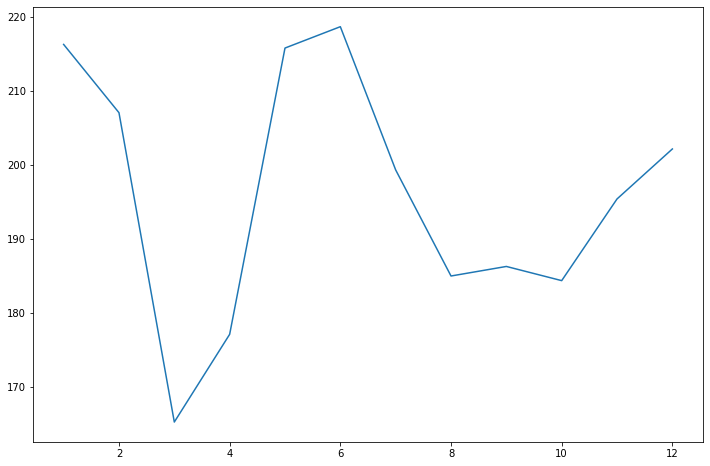

In [ ]:
# create data by month

# group by month
index_month = df.index.month
df_by_month = df.groupby(index_month).mean()
display(df_by_month)

fig, ax = plt.subplots(1,1, figsize=(12, 8))
ax.plot(df_by_month['Open'])
plt.show()

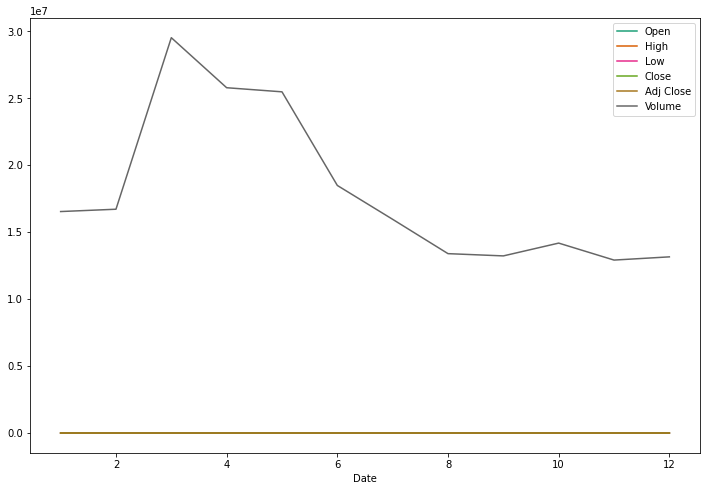

In [ ]:
ax = df_by_month.plot(figsize=(12, 8), colormap = 'Dark2')

plt.show()
                      